<a href="https://colab.research.google.com/github/marielleina/CS129-Project/blob/main/Copy_of_CS129_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import

from google.colab import drive
import numpy as np
import pandas as pd
import datetime
import csv
import os
import cv2
import imageio as iio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# set sizes

IMG_WIDTH = 180
IMG_HEIGHT = 120
NUM_CATEGORIES = 2

In [ ]:
# get colab to work
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Todos:

1. When training, evaluate on validation set. If no val, evaluate on test set when training.
2. Include both datasets before doing train/test split, maybe val
3. When split, in the function gives option stratefy=y, do that
4. Track AORC when training and when evaluate. Goal is to get the as high above .5 as possible. Better to do here bc the data is so imbalanced. Fixes having to manually find threshold. AORC passed into training similar to 'accuracy' that we passed. same for testing. Easier to ID if overfitting or not learning. Could be just threshold is bad. If high AORC, there is some threshold that I can do well
5. Definitely normalize
6. plot train performance over time and accuracy over time

When I ask on Ed for help, link this notebook, not just copy over code.

In [ ]:
# Past Code to read in initial 600 item dataset


# training = []
# image_folder = os.listdir('/content/drive/MyDrive/CS129Project/Glaucoma_Images')
# for image in sorted(image_folder):
#   image_name = os.path.join('/content/drive/MyDrive/CS129Project/Glaucoma_Images', image)
#   image_read = iio.imread(image_name)
#   new_array = cv2.resize(image_read, (IMG_WIDTH, IMG_HEIGHT))
#   training.append(new_array)

# training = []def createTrainingData():
#   for category in CATEGORIES:
#     path = os.path.join(path_test, category)
#     class_num = CATEGORIES.index(category)
#     for img in os.listdir(path):
#       img_array = cv2.imread(os.path.join(path,img))
#       new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#       training.append([new_array, class_num])createTrainingData()

In [ ]:
# for i in range(len(training)):
#   print("each shape ", training[i].shape)

In [ ]:
# past code to make function to read in second 1000 item dataset


#def process_images(directory):
#  image_folder = os.listdir(directory)
#  for image in sorted(image_folder):
#     # print(image)
#     # print(image_folder)
#     image_name = os.path.join(directory, image)
#     # Check if the file is an image
#     if image_name.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
#        image_read = iio.imread(image_name)
#        new_array = cv2.resize(image_read, (IMG_WIDTH, IMG_HEIGHT))
#        training.append(new_array)
#     else:
#        print(f"Skipping non-image file: {image_name}")

In [ ]:
# Call previous function


#directory = '/content/drive/MyDrive/CS129Project/Images'

# process_images(directory)

In [ ]:
# for i in range(len(training)):
#   print("each shape ", training[i].shape)

In [ ]:
# Code to make pandas dataframe of 600 item dataset labels


#filename = '/content/drive/MyDrive/CS129Project/glaucoma.csv'
# filename.encode('utf-8').strip()
# df = pd.read_csv(filename)
# df

In [ ]:
# function to iterate through the label dataset, identify the attached image, and add the label and its image to their respective datasets simulatenously


def readin_data(filename, labels_data, training, directory, dataset):
  df = pd.read_csv(filename)
  for i, row in df.iterrows():

    if dataset == 1:
      col_filename = 'Filename'
      col_label = 'Glaucoma'
    elif dataset == 2:
      col_filename = 'imageID'
      col_label = 'binaryLabels'

    img_filename = row[col_filename]

    if i % 100 == 0:
      print("Counter", i)

    image_name = os.path.join(directory, img_filename)
    if image_name.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
      image_read = iio.imread(image_name)
      new_array = cv2.resize(image_read, (IMG_WIDTH, IMG_HEIGHT))

      # Check if we can find the label
      label = row[col_label]

      labels_data.append(label)
      training.append(new_array)

    else:
      print(f"Skipping non-image file: {image_name}")




In [ ]:
# calls previous function on 600 item dataset

directory = '/content/drive/MyDrive/CS129Project/Glaucoma_Images'
filename = '/content/drive/MyDrive/CS129Project/glaucoma.csv'
filename.encode('utf-8').strip()
df = pd.read_csv(filename)
df
labels_1 = []
training_1 = []
readin_data(filename, labels_1, training_1, directory, 1)

Counter 0


<ipython-input-11-0e6bd6caf50e>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_read = iio.imread(image_name)


Counter 100
Counter 200
Counter 300
Counter 400
Counter 500
Counter 600


In [ ]:
np.mean(np.array(labels_1))

0.25846153846153846

In [ ]:
filename = '/content/drive/MyDrive/CS129Project/glaucoma.csv'
df = pd.read_csv(filename)

In [ ]:
# calls readin function on 1000 item dataset

directory = '/content/drive/MyDrive/CS129Project/Images'
filename = '/content/drive/MyDrive/CS129Project/G1020.csv'
labels_2 = []
training_2 = []
readin_data(filename, labels_2, training_2, directory, 2)

Counter 0


<ipython-input-11-0e6bd6caf50e>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_read = iio.imread(image_name)


Counter 100
Counter 200
Counter 300
Counter 400
Counter 500
Counter 600
Counter 700
Counter 800
Counter 900
Counter 1000


In [ ]:
filename = '/content/drive/MyDrive/CS129Project/G1020.csv'
df_dataset2 = pd.read_csv(filename)
df_dataset2

,imageID,binaryLabels
0,image_0.jpg,0
1,image_1.jpg,0
2,image_3.jpg,0
3,image_4.jpg,0
4,image_5.jpg,0
...,...,...
1015,image_3198.jpg,0
1016,image_3199.jpg,0
1017,image_3201.jpg,1
1018,image_3202.jpg,1


In [ ]:
# combine them into one big dataset
training = np.concatenate([training_1, training_2])
labels_data = np.concatenate([labels_1, labels_2])

training = np.concatenate([training_1])
labels_data = np.concatenate([labels_1])

In [ ]:
len(labels_data)

650

In [ ]:
# previous code to read in 1000 item dataset labels

# filename = '/content/drive/MyDrive/CS129Project/G1020.csv'

# with open(filename) as file:
#   file_reader = csv.reader(file)
#   for row in sorted(file_reader):
#     if row[1].isdigit():
#       labels_data.append(int(row[1]))

In [ ]:
# for i in range(len(training)):
#   print("each shape ", training[i].shape)
# print(labels_data)

In [ ]:
# make data into numpy array so tensorflow accepts it

X_norm = np.array(training)
print("X_norm.shape", X_norm.shape)
#X_norm = X_norm.reshape(-1, IMG_WIDTH, IMG_HEIGHT, 3)
y = np.array(labels_data)

X_norm.shape (650, 120, 180, 3)


In [ ]:
# normalization

X = X_norm/255
print(len(X))
print(len(y))

650
650


In [ ]:
np.unique(X)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [ ]:
# delete all previous variables so colab doesn't complain about memory
del training
del training_1
del training_2
del labels_data
del labels_1
del labels_2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
#%matplotlib widget
import matplotlib.pyplot as plt
#plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# from public_tests import *

# from autils import *
# from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

from sklearn.model_selection import train_test_split

In [ ]:
# #split the data using sklearn routine
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=5)
# print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
# print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)


# make train-validation-test split and print sizes
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, stratify=y, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, stratify=y_, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (390, 120, 180, 3) y_train.shape (390,)
X_cv.shape (130, 120, 180, 3) y_cv.shape (130,)
X_test.shape (130, 120, 180, 3) y_test.shape (130,)


In [ ]:
del X
del y

In [ ]:
# initialize weights randomly so it actually learns

tf.random.set_seed(1234)

In [ ]:
# set up model with ÷convolutions

#model = model = tf.keras.Sequential([
#    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
#                               input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
#    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
#    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
#    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
#    #tf.keras.layers.Dropout(0.5),
#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dense(128, activation=tf.nn.relu),#, kernel_regularizer=tf.keras.regularizers.l2(.0005)),
#    tf.keras.layers.Dense(1,  activation=sigmoid)#, kernel_regularizer=tf.keras.regularizers.l2(.0005))
#                                                           ])

In [ ]:
 model =  tf.keras.models.Sequential([
          tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
          tf.keras.layers.Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(.0005)),
          tf.keras.layers.Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(.0005)),
          tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
# model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 64800)             0         
                                                                 
 dense_3 (Dense)             (None, 120)               7776120   
                                                                 
 dense_4 (Dense)             (None, 40)                4840      
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 7781001 (29.68 MB)
Trainable params: 7781001 (29.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile model with learning rate plugged into adam and get it to spit useful intermediate data back out

model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

In [ ]:
# set up AORC curve data to tell us if overfitting

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


class AORCCallback(tf.keras.callbacks.Callback):
    def __init__(self, X_train, y_train, X_cv, y_cv):
        super(AORCCallback, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_cv
        self.y_val = y_cv

    def on_epoch_end(self, epoch, logs=None):
        y_pred_train = self.model.predict(self.X_train)
        train_auc = roc_auc_score(self.y_train, y_pred_train)
        print(f"\nEpoch {epoch + 1} - Training AUC: {train_auc}")

        y_pred_val = self.model.predict(self.X_val)
        val_auc = roc_auc_score(self.y_val, y_pred_val)
        print(f"Epoch {epoch + 1} - Validation AUC: {val_auc}")

# Assuming you have X_train, y_train, and your model
# Instantiate the custom callback
aorc_callback = AORCCallback(X_train, y_train, X_cv, y_cv)

In [ ]:
# keep track of loss and accuracy so we can plot them later

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Define a custom callback to record training metrics
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super(MetricsCallback, self).__init__()
        self.losses = []
        self.accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs['loss'])
        self.accuracies.append(logs['accuracy'])

# Assuming you have X_train, y_train, and your model
# Instantiate the custom callback
metrics_callback = MetricsCallback()


In [ ]:
# learn and also register loss/accuracy datapoints so we can graph

history = model.fit(X_train, y_train, epochs=130, validation_data=(X_cv, y_cv), callbacks=[aorc_callback, metrics_callback])

Epoch 1/130
13/13 [==============================] - 1s 42ms/step

Epoch 1 - Training AUC: 0.5592517729281579
5/5 [==============================] - 0s 36ms/step
Epoch 1 - Validation AUC: 0.44111215245235863
13/13 [==============================] - 12s 759ms/step - loss: 2.5828 - accuracy: 0.5846 - val_loss: 5.3587 - val_accuracy: 0.2538
Epoch 2/130
13/13 [==============================] - 0s 32ms/step

Epoch 2 - Training AUC: 0.6163965877556614
5/5 [==============================] - 0s 21ms/step
Epoch 2 - Validation AUC: 0.5763823805060918
13/13 [==============================] - 7s 542ms/step - loss: 2.4135 - accuracy: 0.6282 - val_loss: 0.9339 - val_accuracy: 0.7231
Epoch 3/130
13/13 [==============================] - 0s 18ms/step

Epoch 3 - Training AUC: 0.7217787522696907
5/5 [==============================] - 0s 14ms/step
Epoch 3 - Validation AUC: 0.5610746641674477
13/13 [==============================] - 3s 254ms/step - loss: 1.7329 - accuracy: 0.6744 - val_loss: 0.8054 - val_a

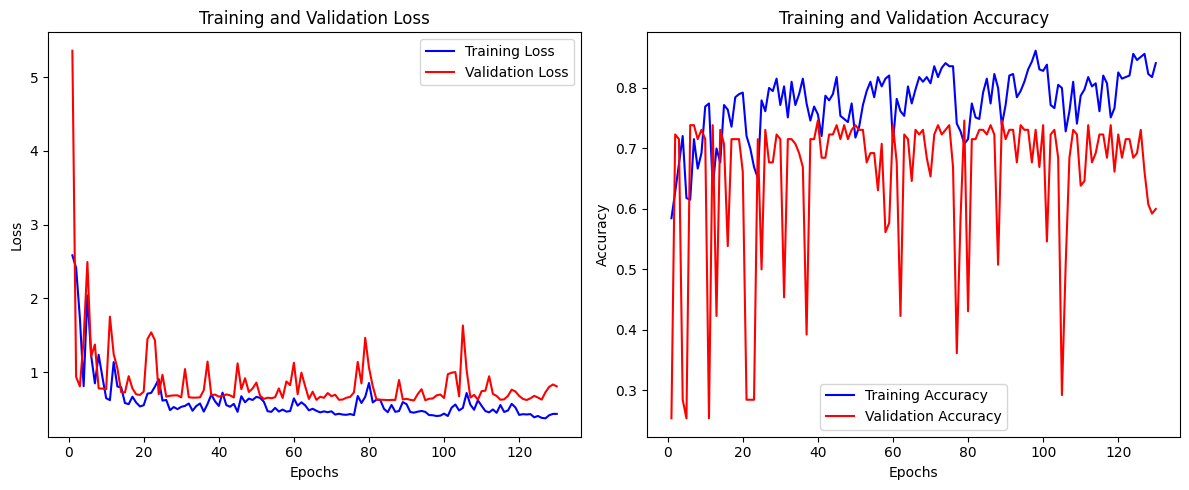

In [ ]:

# # Plot the training performance over time



# plt.figure(figsize=(10, 5))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training Loss Over Time')
# plt.legend()
# plt.show()

# # Plot the training accuracy over time
# plt.figure(figsize=(10, 5))
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training Accuracy Over Time')
# plt.legend()
# plt.show()

# Access the loss and accuracy values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot the loss over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# run it on the test dataset

score = model.evaluate(X_test, y_test, verbose = 0, callbacks=[aorc_callback])
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])

Test Loss:  0.8334978222846985
Test Accuracy:  0.6000000238418579


In [ ]:
# make a confusion matrix

import numpy as np
from sklearn.metrics import confusion_matrix

# Get predictions on the test data
y_pred = model.predict(X_test)
#print("y_pred", y_pred)
# If your model outputs probabilities and you want to convert them to class labels,
# you can use argmax to get the class with the highest probability
threshold = .5
y_pred_labels = tf.where(y_pred >= threshold, 0, 1)

# AUROC

#print("y_pred_labels", y_pred_labels)

# Assuming you have trained your model and obtained predictions on the test data
# Replace y_true with the true labels and y_pred with the predicted labels
# y_true = np.array([0, 1, 0, 1, 1, 0])
# y_pred = np.array([0, 1, 0, 0, 1, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


5/5 [==============================] - 0s 19ms/step
Confusion Matrix:
[[39 57]
 [21 13]]
